In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
elisa = pd.read_csv('http://taanila.fi/ELISA-2016-01-01-2018-10-19.csv', sep = ';', decimal = ',', 
                  skiprows = 1, usecols = [0, 6,])
#Aikaleimat indeksiksi
elisa.index = pd.to_datetime(elisa['Date'])
#Lajittelu vanhimmasta uusimpaan
elisa.sort_index(inplace = True)
elisa.head()

,Date,Closing price
Date,,
2016-01-04,2016-01-04,33.91
2016-01-05,2016-01-05,33.87
2016-01-07,2016-01-07,34.43
2016-01-08,2016-01-08,34.72
2016-01-11,2016-01-11,34.70


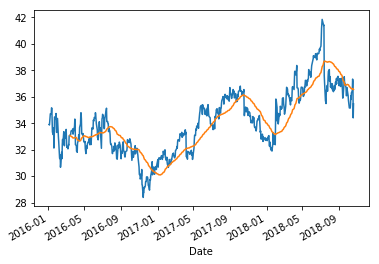

In [3]:
#Liukuva keskiarvo
elisa['rolling50']=elisa['Closing price'].rolling(50).mean()
elisa['Closing price'].plot()
elisa['rolling50'].plot()

In [4]:
#ollaanko liukuvan alapuolella? 
elisa['status']=elisa['Closing price']>elisa['rolling50']
#ostosignaali 1, myyntisignaali -1
elisa['signal']=elisa['status'].astype(int).diff().shift(1)
elisa

,Date,Closing price,rolling50,status,signal
Date,,,,,
2016-01-04,2016-01-04,33.91,NaN,False,NaN
2016-01-05,2016-01-05,33.87,NaN,False,NaN
2016-01-07,2016-01-07,34.43,NaN,False,0.0
2016-01-08,2016-01-08,34.72,NaN,False,0.0
2016-01-11,2016-01-11,34.70,NaN,False,0.0
2016-01-12,2016-01-12,35.17,NaN,False,0.0
2016-01-13,2016-01-13,35.13,NaN,False,0.0
2016-01-14,2016-01-14,34.15,NaN,False,0.0
2016-01-15,2016-01-15,33.34,NaN,False,0.0


In [5]:
#Kaupantekopäivät
trading_days=elisa[elisa['signal']!=0]
trading_days

,Date,Closing price,rolling50,status,signal
Date,,,,,
2016-01-04,2016-01-04,33.91,NaN,False,NaN
2016-01-05,2016-01-05,33.87,NaN,False,NaN
2016-03-15,2016-03-15,33.12,33.0602,True,1.0
2016-04-04,2016-04-04,32.31,32.9268,False,-1.0
2016-04-12,2016-04-12,33.14,32.7134,True,1.0
2016-04-29,2016-04-29,32.61,33.0486,False,-1.0
2016-05-26,2016-05-26,33.63,32.9894,True,1.0
2016-06-15,2016-06-15,33.11,33.1954,False,-1.0
2016-06-21,2016-06-21,33.65,33.2796,True,1.0


In [6]:
#Hahmotelmia laskennasta

money=5000
equities=0
fees=0

def buy(money)
    equities=money//price
    money=money%price
    fees=fees+equities*price*feepercent

def sell(equities)
    money=equities*price
    fees=fees+equities*price*feepercent

for row in action['signal'}
    if row==1:
        buy(money)
    else:
        sell(equities)

SyntaxError: invalid syntax (<ipython-input-6-21d68d004c4e>, line 5)

Lähtöpääoma esim. 5000 euroa?
Kulut lasketaan erikseen (ei pääomasta)?
Ostettavien osakkeiden määrä lasketaan sijoitettavan pääoman perusteella

Lopputulema:
Kuinka monta kauppaa?
Kuinka suuret kulut euroina?
Kuinka suuri tuotto euroina kulujen jälkeen?
Kuinka suuri tuotto-%?
Vertailu kiinteään saman aikavälin sijoitukseen?
Viivakuvio.
Yksittäisten myyntien tuottoprosentit?
Ei kauppoja peräkkäisinä päivinä?

